In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [ ]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/CH7-Regression/data/WisconsinBreastCancerDatabase.csv")
WBCD.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
WBCD[['Radius mean', 'Diagnosis']]  # column subsetting - Extra credit problem.

,Radius mean,Diagnosis
0,17.99,M
1,20.57,M
2,19.69,M
3,11.42,M
4,20.29,M
...,...,...
564,21.56,M
565,20.13,M
566,16.60,M
567,20.60,M


In [ ]:
WBCD.loc[0:5] #row subsetting

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis']  # returns rows with Diagnosis == M and shows only Diaganosis column
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1 # Diaganois column becomes 1 if Dianosis == M --> replace M with 1



WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0  # replace B with 0

WBCD[['Radius mean', 'Diagnosis']]

,Radius mean,Diagnosis
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1
...,...,...
564,21.56,1
565,20.13,1
566,16.60,1
567,20.60,1


In [ ]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
#.values give the underlying Numpy array with the same shape (nsamples, 1)
#.reshape(-1, 1) tells Numpy "make it 2-D with 1 column"

y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)
#astype is used with Pandas DataFrames to convert data types in a column to
#integer type.

print(X) # X is a 2d array
print(y) # y is a 2d array
print(type(y))



[[17.99 ]
 [20.57 ]
 [19.69 ]
 [11.42 ]
 [20.29 ]
 [12.45 ]
 [18.25 ]
 [13.71 ]
 [13.   ]
 [12.46 ]
 [16.02 ]
 [15.78 ]
 [19.17 ]
 [15.85 ]
 [13.73 ]
 [14.54 ]
 [14.68 ]
 [16.13 ]
 [19.81 ]
 [13.54 ]
 [13.08 ]
 [ 9.504]
 [15.34 ]
 [21.16 ]
 [16.65 ]
 [17.14 ]
 [14.58 ]
 [18.61 ]
 [15.3  ]
 [17.57 ]
 [18.63 ]
 [11.84 ]
 [17.02 ]
 [19.27 ]
 [16.13 ]
 [16.74 ]
 [14.25 ]
 [13.03 ]
 [14.99 ]
 [13.48 ]
 [13.44 ]
 [10.95 ]
 [19.07 ]
 [13.28 ]
 [13.17 ]
 [18.65 ]
 [ 8.196]
 [13.17 ]
 [12.05 ]
 [13.49 ]
 [11.76 ]
 [13.64 ]
 [11.94 ]
 [18.22 ]
 [15.1  ]
 [11.52 ]
 [19.21 ]
 [14.71 ]
 [13.05 ]
 [ 8.618]
 [10.17 ]
 [ 8.598]
 [14.25 ]
 [ 9.173]
 [12.68 ]
 [14.78 ]
 [ 9.465]
 [11.31 ]
 [ 9.029]
 [12.78 ]
 [18.94 ]
 [ 8.888]
 [17.2  ]
 [13.8  ]
 [12.31 ]
 [16.07 ]
 [13.53 ]
 [18.05 ]
 [20.18 ]
 [12.86 ]
 [11.45 ]
 [13.34 ]
 [25.22 ]
 [19.1  ]
 [12.   ]
 [18.46 ]
 [14.48 ]
 [19.02 ]
 [12.36 ]
 [14.64 ]
 [14.62 ]
 [15.37 ]
 [13.27 ]
 [13.45 ]
 [15.06 ]
 [20.26 ]
 [12.18 ]
 [ 9.787]
 [11.6  ]
 [14.42 ]


In [ ]:
np.ravel(y.astype(int)) # Note that ravel flattens 2d array to 1d array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

LogisticRegression()

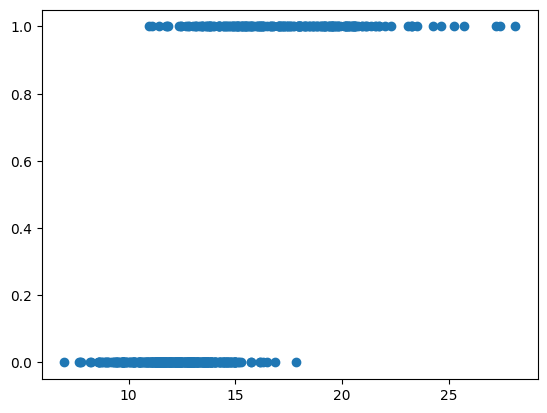

In [ ]:
plt.scatter(X,y)


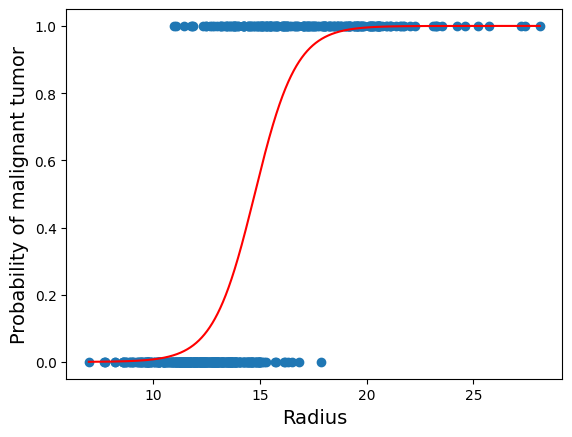

In [ ]:
plt.scatter(X,y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1,1).astype(int) #either 0 or 1

#note that [:,1] is used below --> probability of tumor being malignant
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]

plt.plot(xDelta, yDeltaProb, color ="red")
plt.xlabel("Radius", fontsize=14)
plt.ylabel("Probability of malignant tumor", fontsize=14)
plt.show()

In [ ]:
logisticModel.coef_

array([[1.02519623]])

In [ ]:
logisticModel.coef_[0][0]

np.float64(1.0251962293185457)

In [ ]:
logisticModel.intercept_

array([-15.12718591])

In [ ]:
pHatProb = logisticModel.predict_proba([[13]])
pHatProb
#This indicates the predicted probabilities for the two classes (Benign and Malignant)
#given an input feature value (e.g., Radius Mean of 13):

# 0.85: The model predicts an 85% probability that the tumor is Benign.
# 0.15: The model predicts a 15% probability that the tumor is Malignant.

array([[0.85810449, 0.14189551]])

In [ ]:
pHat = logisticModel.predict([[13]])
pHat

array([0])

In [ ]:
#quiz problem
pHatProb = logisticModel.predict_proba([[15]])
pHatProb

array([[0.43763705, 0.56236295]])

In [ ]:
pHat = logisticModel.predict([[15]])
pHat

array([1])